Prepare environment and load data

In [9]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

#Load the data
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv("data/test.csv")

#Explore the data
print(train_data.head())
print(train_data.info())
print(train_data.describe())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null  

Preprocess the data

In [10]:
#Make a copy of the data to avoid modifying the original data
data = train_data.copy()

#Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop(columns=['Cabin'], inplace=True)  

#Convert categorical columns to numberic
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

#Convert new features (Feature Engineering)
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)

#Drop unnecessary columns
data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

print(data.head())

   Survived  Pclass  Sex   Age  ...     Fare  Embarked  FamilySize  IsAlone
0         0       3    1  22.0  ...   7.2500         2           2        0
1         1       1    0  38.0  ...  71.2833         0           2        0
2         1       3    0  26.0  ...   7.9250         2           1        1
3         1       1    0  35.0  ...  53.1000         2           2        0
4         0       3    1  35.0  ...   8.0500         2           1        1

[5 rows x 10 columns]


C:\Users\Admin\AppData\Local\Temp\ipykernel_14268\2880160709.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14268\2880160709.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

Analyze the Data

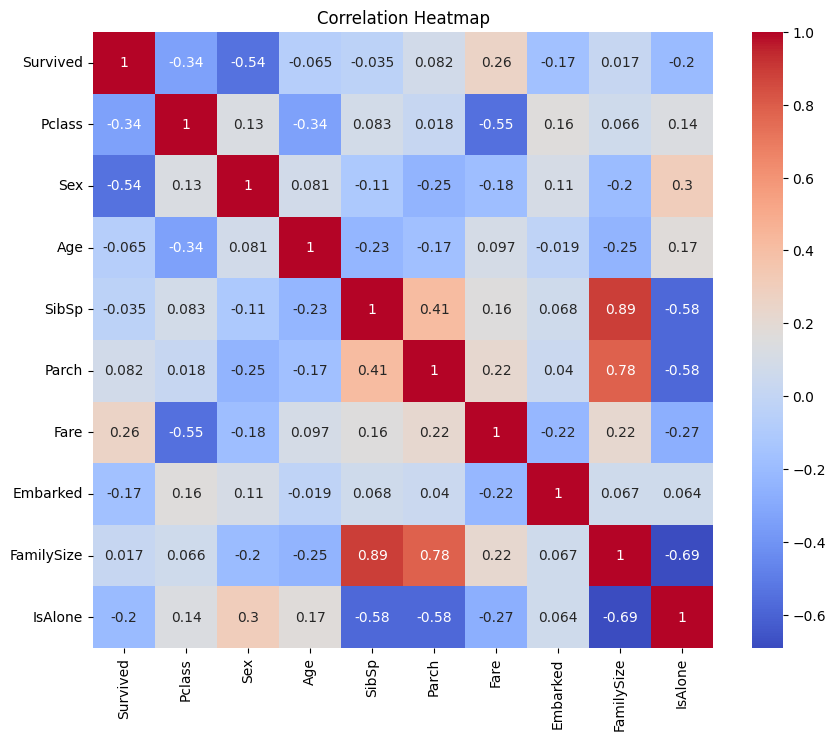

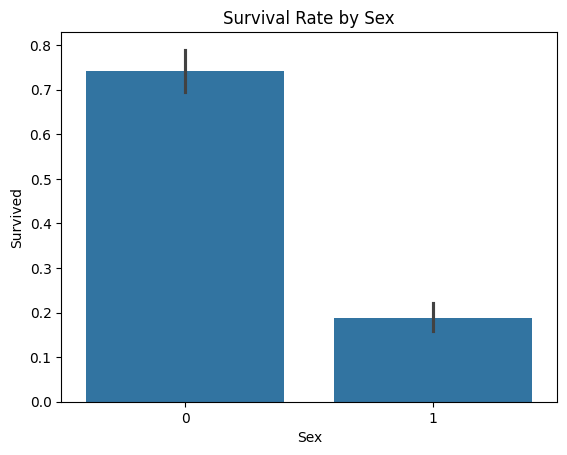

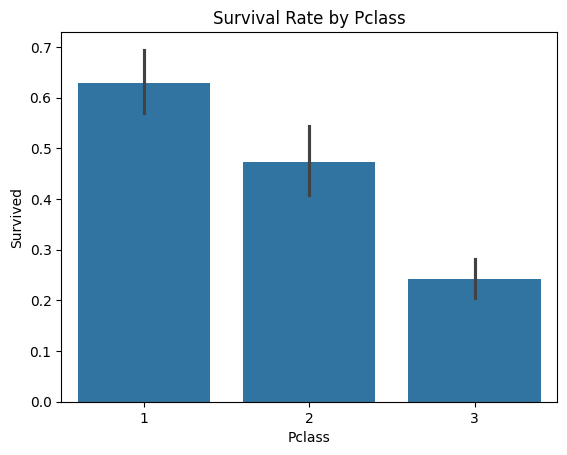

In [11]:
#Visualize correlation using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#Analyze 'Sex' column
sns.barplot(x='Sex', y = 'Survived', data=data)
plt.title("Survival Rate by Sex")
plt.show()

#Analyze 'Pclass' column
sns.barplot(x='Pclass', y = 'Survived', data=data)
plt.title("Survival Rate by Pclass")
plt.show()

Build and Evaluate the model

In [12]:
#Split the data
X = data.drop(columns=['Survived'])
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Train a random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Evaluate the model on the test set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179

Accuracy:  0.8156424581005587


Predict on the Test set

In [13]:
test = test_data.copy()
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)
test['Sex'] = le.fit_transform(test['Sex'])
test['Embarked'] = le.fit_transform(test['Embarked'])
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['IsAlone'] = (test['FamilySize'] == 1).astype(int)
test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

#Scale the test data
test = scaler.transform(test)

#Predict using the trained model
test_predictions = model.predict(test)

#Create a submission file
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'], 
    'Survived': test_predictions})
submission.to_csv("submission.csv", index=False)
print("The predictions have been saved as submission.csv")

The predictions have been saved as submission.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_14268\3429740424.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14268\3429740424.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F